
Exercises for K-Nearest Neighbors (KNN) and Logistic Regression on Breast Cancer Diagnosis Dataset

Exercise 1: Data Exploration and Preprocessing

1. Load and Explore the Data

In [1]:
# Step 1: Import necessary libraries
import pandas as pd

In [2]:
# Step 2: Load the dataset into a pandas DataFrame
file_name = 'Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv'  # Update with actual file path if needed
df = pd.read_csv(file_name)

In [3]:
# Step 3: Display the first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))

First 10 rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840     

In [4]:
# Step 4: Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal

In [5]:
# Step 5: Descriptive statistics of the dataset
print("\nDescriptive statistics of the dataset:")
print(df.describe())


Descriptive statistics of the dataset:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std  

In [7]:
# Step 6: Summarize the dataset
num_instances = df.shape[0]
num_features = df.shape[1]

print(f"\nSummary of the dataset:\nNumber of instances: {num_instances}\nNumber of features: {num_features}")



Summary of the dataset:
Number of instances: 569
Number of features: 33


In [8]:
# Step 7: Variance of the features (excluding the 'id' and 'diagnosis' columns)
feature_variances = df.iloc[:, 2:].var()  # Excluding non-numeric columns
highest_variance_features = feature_variances.nlargest(5)  # Top 5 features with highest variance

print("\nTop 5 features with the highest variance:")
print(highest_variance_features)


Top 5 features with the highest variance:
area_worst         324167.385102
area_mean          123843.554318
area_se              2069.431583
perimeter_worst      1129.130847
perimeter_mean        590.440480
dtype: float64



2. Preprocessing

In [9]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
# Step 2: Drop irrelevant columns
# Dropping 'id' column and unnamed columns
df_cleaned = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')


In [11]:
# Step 3: Convert the 'diagnosis' column to numerical format (M = 1, B = 0)
df_cleaned['diagnosis'] = df_cleaned['diagnosis'].map({'M': 1, 'B': 0})


In [12]:
# Step 4: Separate features and target variable
X = df_cleaned.drop(columns=['diagnosis'])  # Features (independent variables)
y = df_cleaned['diagnosis']  # Target (dependent variable)


In [14]:
# Step 5 (Optional): Normalize/Standardize the features to ensure they're on the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Split the dataset into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Output to check the sizes of the training and testing sets
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (455, 30)
Testing set size: (114, 30)


Exercise 2: Implementing the K-Nearest Neighbors (KNN) Model

1.Implement a KNN Classifier

In [15]:
# Step 1: Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Step 2: Initialize the KNN classifier (with n_neighbors=5 by default)
knn = KNeighborsClassifier(n_neighbors=5)


In [17]:
# Step 3: Train the KNN classifier using the training data
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [18]:
# Step 4: Predict the tumor diagnosis on the test data
y_pred = knn.predict(X_test)


In [19]:
# Step 5: Calculate the accuracy of the KNN model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the KNN model: {accuracy * 100:.2f}%")


Accuracy of the KNN model: 94.74%


In [20]:
# Step 6: Confusion matrix for the predictions
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[68  3]
 [ 3 40]]


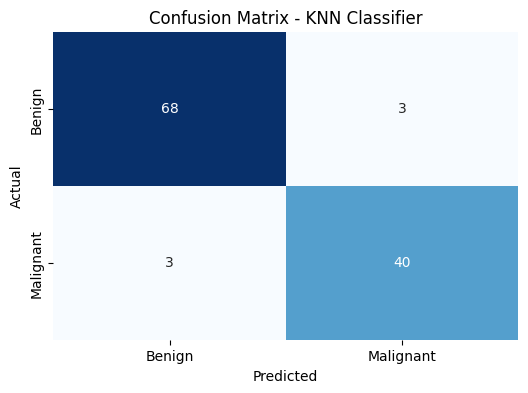

In [21]:
# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN Classifier')
plt.show()


2. Experiment with Different Values of n_neighbors

In [22]:
# Step 1: Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [23]:
# Step 2: Define the range of n_neighbors values to experiment with
neighbors_range = [3, 5, 7, 9, 11, 13]


In [24]:
# Step 3: Initialize an empty list to store accuracies
accuracies = []


In [25]:
# Step 4: Loop through each value of n_neighbors
for n in neighbors_range:
    # Initialize the KNN classifier with the current value of n_neighbors
    knn = KNeighborsClassifier(n_neighbors=n)

    # Train the classifier with the training data
    knn.fit(X_train, y_train)

    # Predict the tumor diagnosis on the test data
    y_pred = knn.predict(X_test)

    # Calculate the accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)


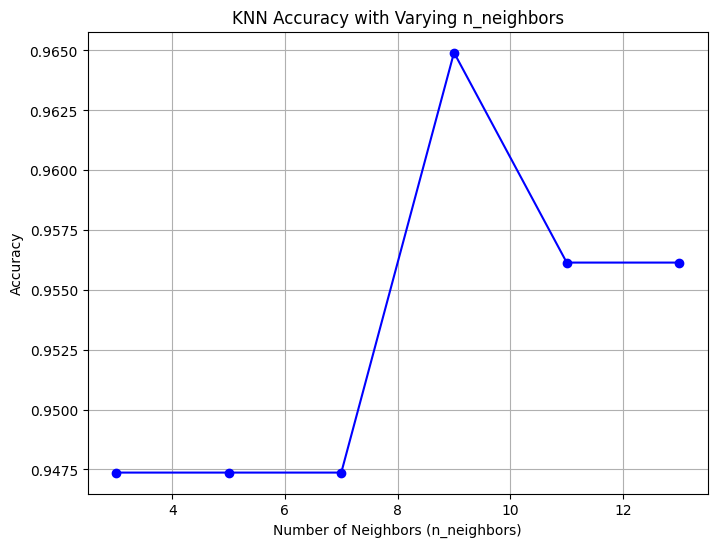

In [26]:
# Step 5: Plot the results
plt.figure(figsize=(8, 6))
plt.plot(neighbors_range, accuracies, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy with Varying n_neighbors')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [27]:
# Step 6: Find the optimal n_neighbors value based on accuracy
optimal_n = neighbors_range[accuracies.index(max(accuracies))]
print(f"The optimal value of n_neighbors is: {optimal_n}")
print(f"Highest accuracy: {max(accuracies) * 100:.2f}%")


The optimal value of n_neighbors is: 9
Highest accuracy: 96.49%


Exercise 3: Implementing Logistic Regression

1.Implement a Logistic Regression Classifier

In [28]:
# Step 1: Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [29]:
# Step 2: Initialize the Logistic Regression classifier
logreg = LogisticRegression(max_iter=1000)  # Setting max_iter to 1000 to ensure convergence


In [30]:
# Step 3: Train the Logistic Regression model using the training data
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [31]:
# Step 4: Predict the tumor diagnosis on the test data
y_pred = logreg.predict(X_test)


In [32]:
# Step 5: Calculate the accuracy of the Logistic Regression model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy * 100:.2f}%")


Accuracy of the Logistic Regression model: 97.37%


In [33]:
# Step 6: Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[70  1]
 [ 2 41]]


In [34]:
# Step 7: Classification report (precision, recall, F1-score)
class_report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print("\nClassification Report:")
print(class_report)



Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        71
   Malignant       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



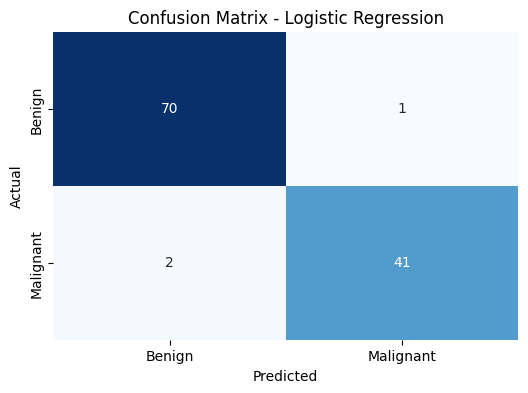

In [35]:
# Step 8: Visualize the confusion matrix using a heatmap (optional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


2. Comparison of KNN and Logistic Regression

In [36]:
# Step 1: Reuse the Logistic Regression model from earlier
# Already fitted logreg, so no need to retrain
y_pred_logreg = logreg.predict(X_test)

In [37]:
# Step 2: Get predictions from the KNN model
y_pred_knn = knn.predict(X_test)  # Assuming KNN model was already trained with n_neighbors=5


In [38]:
# Step 3: Calculate accuracy, precision, recall, and F1-score for Logistic Regression
print("Logistic Regression Performance:")
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg, target_names=['Benign', 'Malignant'])
print(f"Accuracy: {accuracy_logreg * 100:.2f}%")
print("Classification Report:\n", class_report_logreg)


Logistic Regression Performance:
Accuracy: 97.37%
Classification Report:
               precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        71
   Malignant       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [39]:
# Step 4: Calculate accuracy, precision, recall, and F1-score for KNN
print("K-Nearest Neighbors Performance:")
accuracy_knn = accuracy_score(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn, target_names=['Benign', 'Malignant'])
print(f"Accuracy: {accuracy_knn * 100:.2f}%")
print("Classification Report:\n", class_report_knn)


K-Nearest Neighbors Performance:
Accuracy: 95.61%
Classification Report:
               precision    recall  f1-score   support

      Benign       0.96      0.97      0.97        71
   Malignant       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [40]:
# Step 5: Visualize the comparison (Optional)
import matplotlib.pyplot as plt
import numpy as np


In [41]:
# Extract F1-scores from the classification reports for both models
logreg_f1 = np.mean([float(line.split()[-2]) for line in class_report_logreg.splitlines() if 'Benign' in line or 'Malignant' in line])
knn_f1 = np.mean([float(line.split()[-2]) for line in class_report_knn.splitlines() if 'Benign' in line or 'Malignant' in line])


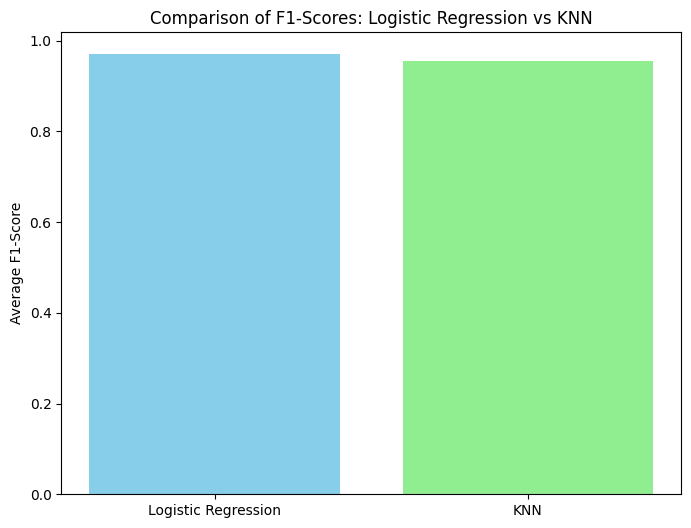

In [42]:
# Plotting the comparison of F1-scores
models = ['Logistic Regression', 'KNN']
f1_scores = [logreg_f1, knn_f1]

plt.figure(figsize=(8,6))
plt.bar(models, f1_scores, color=['skyblue', 'lightgreen'])
plt.ylabel('Average F1-Score')
plt.title('Comparison of F1-Scores: Logistic Regression vs KNN')
plt.show()

Exercise 4: Hyperparameter Tuning and Cross-Validation

1. Grid Search for Hyperparameter Tuning

In [43]:
# Step 1: Import necessary libraries for Grid Search
from sklearn.model_selection import GridSearchCV


In [44]:
# Step 2: Define the hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],          # Number of neighbors to test
    'weights': ['uniform', 'distance'],       # Uniform or distance-based weights
    'p': [1, 2]                               # p=1 for Manhattan distance, p=2 for Euclidean distance
}

In [45]:
# Step 3: Initialize the KNN classifier
knn = KNeighborsClassifier()


In [46]:
# Step 4: Initialize GridSearchCV with KNN and the parameter grid
# cv=5 means 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)


In [47]:
# Step 5: Perform the grid search on the training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [48]:
# Step 6: Get the best hyperparameters and the corresponding best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_accuracy * 100:.2f}%")


Best Hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 96.48%


In [49]:
# Step 7: Use the best model to make predictions on the test data and evaluate its accuracy
best_knn = grid_search.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)


In [50]:
# Calculate the accuracy on the test data
test_accuracy = accuracy_score(y_test, y_pred_best_knn)
print(f"Test Accuracy of Best KNN Model: {test_accuracy * 100:.2f}%")


Test Accuracy of Best KNN Model: 96.49%


2. Cross-Validation for Logistic Regression

In [51]:
# Step 1: Import necessary libraries for cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


In [52]:
# Step 2: Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # Use max_iter=1000 to ensure convergence


In [53]:
# Step 3: Perform 5-fold cross-validation on the logistic regression model
# cv=5 means 5-fold cross-validation
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')


In [54]:
# Step 4: Report the cross-validated accuracy scores and the mean accuracy
print(f"Cross-Validated Accuracies: {cv_scores}")
print(f"Mean Cross-Validated Accuracy: {cv_scores.mean() * 100:.2f}%")


Cross-Validated Accuracies: [0.97802198 0.96703297 1.         0.97802198 0.95604396]
Mean Cross-Validated Accuracy: 97.58%


Exercise 5: Decision Boundary Visualization

1. Visualizing the Decision Boundary

In [55]:
# Step 1: Import necessary libraries for PCA and plotting
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [56]:
# Step 2: Reduce dimensionality of the dataset to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [57]:
# Step 3: Train the KNN and Logistic Regression models on the 2D data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_pca, y_train)

LogisticRegression(max_iter=1000)

In [58]:
# Step 4: Create a mesh grid for plotting decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

In [63]:
# Assuming X is a pandas DataFrame
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

In [64]:

# Create mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

In [65]:
# Flatten the mesh grid and pass it to the model for prediction
Z_knn = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)

Z_logreg = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z_logreg = Z_logreg.reshape(xx.shape)

In [66]:
# Step 6: Plot the decision boundaries for KNN and Logistic Regression
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Principal Component 2')

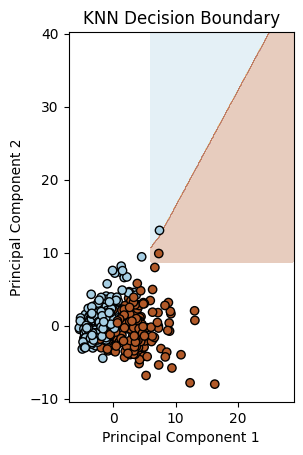

In [67]:
# Plot KNN decision boundary
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_knn, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.Paired)
plt.title('KNN Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

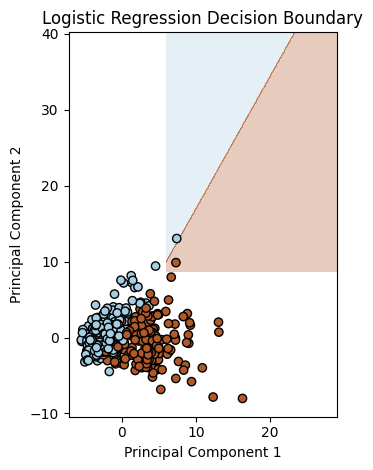

In [68]:
# Plot Logistic Regression decision boundary
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_logreg, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.Paired)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()